In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
dataset = pd.read_csv('/home/urwa/Documents/side_projects/urban/data/featureData/jfk.csv')

In [4]:
def train(model, optimiser, scheduler, criterion,epochs = 500):
    losses = []
    # Main optimization loop
    for t in range(epochs):

        optimiser.zero_grad()

        y_predicted = model(X_train)

        current_loss = criterion(y_predicted, y_train)

        current_loss.backward()

        optimiser.step()

        print(f"t = {t}, loss = {current_loss}")

        losses.append(current_loss)

        scheduler.step()    
    return losses,model

In [5]:
dataset.shape

(8757, 1049)

In [6]:
dataset.head(3)

,Date,Hour,1,10,100,101,102,106,107,108,...,91_lag_3,92_lag_3,93_lag_3,94_lag_3,95_lag_3,96_lag_3,97_lag_3,98_lag_3,99_lag_3,arrival_lag_3
0,2018-01-01,3,0,0,0,0,0,0,0,0,...,1.0,1.0,0.0,1.0,6.0,0.0,1.0,0.0,0.0,6.0
1,2018-01-01,4,0,3,0,0,1,0,0,1,...,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0
2,2018-01-01,5,0,4,0,0,1,2,3,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [7]:
class Linear_Net(nn.Module):
    def __init__(self, in_features,out_features):
        super(Linear_Net, self).__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features=out_features, bias=True)
        
    def forward(self, x):
        return self.fc1(x)

In [8]:
class Simple_Net(nn.Module):
    def __init__(self, in_features,out_features):
        super(Simple_Net, self).__init__()
        self.fc1 = nn.Linear(in_features=in_features, out_features=1000, bias=True)
        self.fc2 = nn.Linear(in_features=1000, out_features=500, bias=True)
        self.fc3 = nn.Linear(in_features=500, out_features=out_features, bias=True)
        
    def forward(self, x):
        y = F.relu(self.fc1(x))
        y = F.relu(self.fc2(y))
        y = self.fc3(y)
        return y

In [9]:
lag_columns = [c for c in dataset.columns if 'lag' in c]
len(lag_columns)

777

In [10]:
DateColumns = ['Date']

ext_columns = ['Dow', 'arrival','maxtemp', 'mintemp', 'avgtemp', 'departure', 'hdd',
       'cdd', 'participation', 'newsnow', 'snowdepth', 'ifSnow']

targetColumns = [c for c in dataset.columns if c not in ext_columns and \
                c not in DateColumns and c not in lag_columns and c != 'Hour']
len(targetColumns)

258

In [11]:
features_cols = [c for c in dataset.columns if c not in targetColumns and c not in DateColumns]
len(features_cols)

790

In [12]:
x = dataset[features_cols].values
y = dataset[targetColumns].values

In [13]:
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# scaler_x.fit(x)
# scaler_y.fit(y)

# x = scaler_x.transform(x)
# y = scaler_y.transform(y)

In [14]:
x = torch.tensor(x).float().to(device)
print(x.shape)
y = torch.tensor(y).float().to(device)
print(y.shape)

torch.Size([8757, 790])
torch.Size([8757, 258])


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

t = 0, loss = 3.945075511932373
t = 1, loss = 3.5066444873809814
t = 2, loss = 3.5782277584075928
t = 3, loss = 3.760641574859619
t = 4, loss = 3.6900789737701416
t = 5, loss = 3.8508338928222656
t = 6, loss = 3.707540512084961
t = 7, loss = 3.8576674461364746
t = 8, loss = 3.7046079635620117
t = 9, loss = 3.8610286712646484
t = 10, loss = 3.7039833068847656
t = 11, loss = 3.866161823272705
t = 12, loss = 3.7032883167266846
t = 13, loss = 3.8670191764831543
t = 14, loss = 3.701852560043335
t = 15, loss = 3.8673946857452393
t = 16, loss = 3.7023205757141113
t = 17, loss = 3.869685411453247
t = 18, loss = 3.701101779937744
t = 19, loss = 3.870021343231201
t = 20, loss = 3.6984243392944336
t = 21, loss = 3.869065761566162
t = 22, loss = 3.69588041305542
t = 23, loss = 3.8680527210235596
t = 24, loss = 3.6939237117767334
t = 25, loss = 3.8673267364501953
t = 26, loss = 3.6928598880767822
t = 27, loss = 3.867093563079834
t = 28, loss = 3.692352533340454
t = 29, loss = 3.867011308670044
t = 

t = 339, loss = 1.4307582378387451
t = 340, loss = 1.4307552576065063
t = 341, loss = 1.4307522773742676
t = 342, loss = 1.4307490587234497
t = 343, loss = 1.4307461977005005
t = 344, loss = 1.4307432174682617
t = 345, loss = 1.4307399988174438
t = 346, loss = 1.4307372570037842
t = 347, loss = 1.4307340383529663
t = 348, loss = 1.430731177330017
t = 349, loss = 1.4307280778884888
t = 350, loss = 1.4307249784469604
t = 351, loss = 1.4307219982147217
t = 352, loss = 1.4307188987731934
t = 353, loss = 1.4307160377502441
t = 354, loss = 1.4307130575180054
t = 355, loss = 1.4307100772857666
t = 356, loss = 1.4307068586349487
t = 357, loss = 1.4307039976119995
t = 358, loss = 1.4307008981704712
t = 359, loss = 1.430698037147522
t = 360, loss = 1.430694818496704
t = 361, loss = 1.4306918382644653
t = 362, loss = 1.4306888580322266
t = 363, loss = 1.4306858777999878
t = 364, loss = 1.4306827783584595
t = 365, loss = 1.4306797981262207
t = 366, loss = 1.430676817893982
t = 367, loss = 1.430673

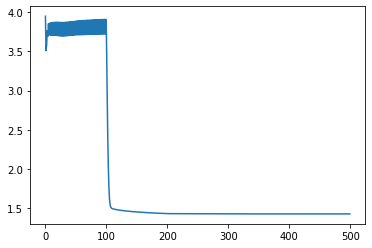

In [16]:
in_feat = len(features_cols)
out_feat = len(targetColumns)
model = Linear_Net(in_features=in_feat ,out_features=out_feat).to(device)

criterion = nn.L1Loss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=100, gamma=0.1)

losses,model = train(model, optimiser, scheduler, criterion, epochs = 500)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_train = model(X_train)

plt.plot(losses)


train_r2 = r2_score(y_train.detach().cpu().numpy(), y_pred_train.detach().cpu().numpy(), multioutput='variance_weighted')
test_r2=r2_score(y_test.detach().cpu().numpy(), y_pred_test.detach().cpu().numpy(), multioutput='variance_weighted')

print("Training R2: ",train_r2)
print("Test R2: ",test_r2)


t = 0, loss = 2.506361246109009
t = 1, loss = 2.2773966789245605
t = 2, loss = 2.177927255630493
t = 3, loss = 2.065777540206909
t = 4, loss = 1.9325838088989258
t = 5, loss = 1.81338369846344
t = 6, loss = 1.7266521453857422
t = 7, loss = 1.7068370580673218
t = 8, loss = 1.660282015800476
t = 9, loss = 1.6279807090759277
t = 10, loss = 1.5599104166030884
t = 11, loss = 1.53435218334198
t = 12, loss = 1.5048505067825317
t = 13, loss = 1.4758268594741821
t = 14, loss = 1.4561454057693481
t = 15, loss = 1.4291974306106567
t = 16, loss = 1.4079010486602783
t = 17, loss = 1.3852083683013916
t = 18, loss = 1.3751728534698486
t = 19, loss = 1.3541477918624878
t = 20, loss = 1.3452671766281128
t = 21, loss = 1.3349553346633911
t = 22, loss = 1.3331881761550903
t = 23, loss = 1.3166348934173584
t = 24, loss = 1.3130065202713013
t = 25, loss = 1.3096239566802979
t = 26, loss = 1.2907520532608032
t = 27, loss = 1.2901866436004639
t = 28, loss = 1.2729181051254272
t = 29, loss = 1.285645484924316

t = 263, loss = 1.1434539556503296
t = 264, loss = 1.1434483528137207
t = 265, loss = 1.1434427499771118
t = 266, loss = 1.143437147140503
t = 267, loss = 1.143431544303894
t = 268, loss = 1.1434258222579956
t = 269, loss = 1.1434203386306763
t = 270, loss = 1.1434146165847778
t = 271, loss = 1.1434091329574585
t = 272, loss = 1.14340341091156
t = 273, loss = 1.1433979272842407
t = 274, loss = 1.1433922052383423
t = 275, loss = 1.143386721611023
t = 276, loss = 1.1433809995651245
t = 277, loss = 1.1433753967285156
t = 278, loss = 1.1433697938919067
t = 279, loss = 1.1433641910552979
t = 280, loss = 1.1433584690093994
t = 281, loss = 1.1433528661727905
t = 282, loss = 1.1433472633361816
t = 283, loss = 1.1433417797088623
t = 284, loss = 1.1433361768722534
t = 285, loss = 1.1433305740356445
t = 286, loss = 1.143324851989746
t = 287, loss = 1.1433193683624268
t = 288, loss = 1.1433136463165283
t = 289, loss = 1.1433080434799194
t = 290, loss = 1.1433024406433105
t = 291, loss = 1.14329683

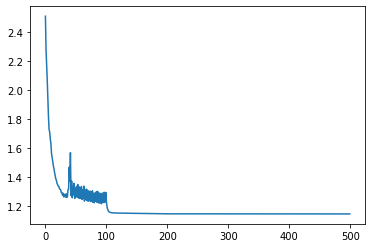

In [17]:
in_feat = len(features_cols)
out_feat = len(targetColumns)
model = Simple_Net(in_features=in_feat ,out_features=out_feat).to(device)

criterion = nn.L1Loss()
optimiser = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.StepLR(optimiser, step_size=100, gamma=0.1)

losses,model = train(model, optimiser, scheduler, criterion, epochs = 500)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    y_pred_train = model(X_train)

plt.plot(losses)


train_r2 = r2_score(y_train.detach().cpu().numpy(), y_pred_train.detach().cpu().numpy(), multioutput='variance_weighted')
test_r2=r2_score(y_test.detach().cpu().numpy(), y_pred_test.detach().cpu().numpy(), multioutput='variance_weighted')

print("Training R2: ",train_r2)
print("Test R2: ",test_r2)
